## Import Necessary Libraries

In [112]:
from keras.preprocessing.text import Tokenizer
import numpy as np
import re
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Embedding ,LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

## Open file as list


In [113]:
with open('jokes.txt' , 'r' , errors='ignore' ) as file:
  a = file.readlines()
data = [item.strip() for item in a]

## Changing the capital letters to lowercase


In [114]:
data_lower = []
for dat in data:
    data_lower.append(dat.lower())

## Contractions Dictionary


In [115]:
contractions_dict = {
    "i’m": "i am",
    "i’ve": "i have",
    "i’ve": "i have",
    "i’ll": "i will",
    "i’d" : "i would",
    "you’re": "you are",
    "you’ve": "you have",
    "you’ll": "you will",
    "he’s": "he is",
    "he’ll": "he will",
    "she’s": "she is",
    "she’ll": "she will",
    "it’s": "it is",
    "we’re": "we are",
    "we’ve": "we have",
    "we’ll": "we will",
    "they’re": "they are",
    "they’ve": "they have",
    "they’ll": "they will",
    "can’t": "cannot",
    "can't" :  "cannot",
    "won’t": "will not",
    "isn’t": "is not",
    "wouldn’t": "would not",
    "what’s" : "what is",
    "it'll" : "it will",
    "there's" : "there is",
    "didn't" : "did not" , 
    "don’t" : "do not",
    "it’d" : "it would",
    "they’d" : "they would",
    "it's" : "it is",
    "that’s" : "that is"
    
}

In [116]:
data_lower

['did you hear about the fire at the shoe factory? unfortunately, many soles were lost.',
 'what do you call a pig who knows how to use a knife? a pork chop.',
 'what kind of fish knows how to do an appendectomy? a sturgeon.',
 'how do you hire a horse? put up a ladder.',
 'why did the pony ask for a glass of water? because it was a little horse.',
 "is there anything worse than when it's raining cats and dogs? yes, hailing taxis.",
 'how many apples can you grow on a tree? all of them.',
 "my manager told me to have a good day. so i didn't go into work.",
 'what do kids play when they have nothing else to do? bored games.',
 "what did the boy say to his fingers? i'm counting on you.",
 'what kind of music do elves listen to? wrap music.',
 'what does cake and baseball have in common? they both need a batter.',
 'when does friday come before thursday? in the dictionary.',
 'what did the tree say when spring finally arrived? what a re-leaf.',
 "how can you tell if a pig is hot? it's bac

## Tokenize the words and remove any punctuation marks and symbol

In [117]:
words = []
data_purified = []
for low in data_lower:
    a = re.split('[,\“\”\"\-!\s.?\n]+' ,low)
    container = []
    for any in a:
        if any != '':
            if any in contractions_dict:
                any = contractions_dict[any]
                val = any.split()
                for i in val:
                    words.append(i)
                    container.append(i)
            words.append(any)
            container.append(any)
    data_purified.append(' '.join(container))


In [118]:
data_purified

['did you hear about the fire at the shoe factory unfortunately many soles were lost',
 'what do you call a pig who knows how to use a knife a pork chop',
 'what kind of fish knows how to do an appendectomy a sturgeon',
 'how do you hire a horse put up a ladder',
 'why did the pony ask for a glass of water because it was a little horse',
 'is there anything worse than when it is it is raining cats and dogs yes hailing taxis',
 'how many apples can you grow on a tree all of them',
 'my manager told me to have a good day so i did not did not go into work',
 'what do kids play when they have nothing else to do bored games',
 "what did the boy say to his fingers i'm counting on you",
 'what kind of music do elves listen to wrap music',
 'what does cake and baseball have in common they both need a batter',
 'when does friday come before thursday in the dictionary',
 'what did the tree say when spring finally arrived what a re leaf',
 'how can you tell if a pig is hot it is it is bacon',
 'd

In [119]:
tokenizer = Tokenizer()

In [120]:
tokenizer.fit_on_texts(words)

In [121]:
x_seq = []
for tex in data_purified:
    encoded_tex= tokenizer.texts_to_sequences([tex])[0]
    for i in range(1,len(encoded_tex)):
      x_seq.append(encoded_tex[:i+1])

In [122]:
max_length = max([len(x) for x in x_seq])

In [123]:
padded_x_seq = pad_sequences(x_seq , maxlen=max_length , padding='pre')

In [124]:
padded_x_seq

array([[  0,   0,   0, ...,   0,  11,   7],
       [  0,   0,   0, ...,  11,   7,  40],
       [  0,   0,   0, ...,   7,  40,  30],
       ...,
       [  0,   0,   0, ..., 121,   3,  19],
       [  0,   0,   0, ...,   3,  19, 360],
       [  0,   0,   0, ...,  19, 360, 170]])

In [125]:
X_train = padded_x_seq[: , :-1]

In [126]:
y_ = padded_x_seq[: , -1]

## Total Number of Unique words


In [127]:
length = len(tokenizer.word_index)

##  Encoding words

In [128]:
y_train = to_categorical(y_ , num_classes=(length+1))

## Building the model

In [129]:
model =Sequential()
model.add(Embedding((length+1) , 100 , input_length =(max_length-1)))
model.add(LSTM(130))
model.add(Dense((length+1) , activation = 'softmax'))

In [130]:
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 55, 100)           214600    
                                                                 
 lstm_2 (LSTM)               (None, 130)               120120    
                                                                 
 dense_2 (Dense)             (None, 2146)              281126    
                                                                 
Total params: 615846 (2.35 MB)
Trainable params: 615846 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the model

In [132]:
history =model.fit(X_train , y_train, epochs= 50)

Epoch 1/50
267/267 [==============================] - 10s 32ms/step - loss: 6.5329 - accuracy: 0.0421
Epoch 2/50
267/267 [==============================] - 9s 33ms/step - loss: 6.0176 - accuracy: 0.0488
Epoch 3/50
267/267 [==============================] - 9s 33ms/step - loss: 5.7965 - accuracy: 0.0771
Epoch 4/50
267/267 [==============================] - 9s 33ms/step - loss: 5.5107 - accuracy: 0.1075
Epoch 5/50
267/267 [==============================] - 9s 33ms/step - loss: 5.1972 - accuracy: 0.1437
Epoch 6/50
267/267 [==============================] - 9s 33ms/step - loss: 4.9029 - accuracy: 0.1676
Epoch 7/50
267/267 [==============================] - 9s 35ms/step - loss: 4.6280 - accuracy: 0.1892
Epoch 8/50
267/267 [==============================] - 9s 34ms/step - loss: 4.3722 - accuracy: 0.2131
Epoch 9/50
267/267 [==============================] - 9s 33ms/step - loss: 4.1337 - accuracy: 0.2360
Epoch 10/50
267/267 [==============================] - 9s 33ms/step - loss: 3.9015 - accur

Text(0, 0.5, 'Value')

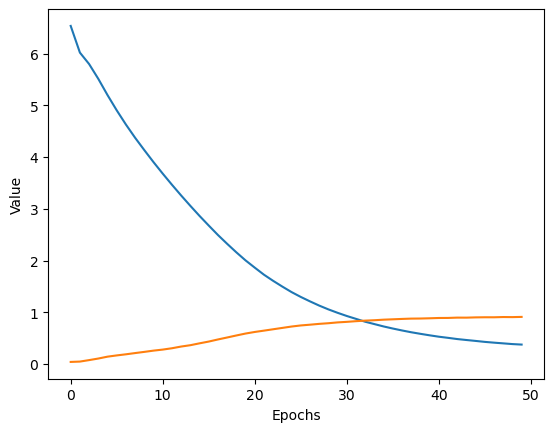

In [133]:
plt.plot(history.history['loss'] ,label='Loss' )
plt.plot(history.history['accuracy'] , label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')

In [138]:
import time
text_p = 'my wife said'
for i in range(16):
  int_text = tokenizer.texts_to_sequences([text_p])[0]
  pad_text = pad_sequences([int_text] , maxlen=max_length-1 , padding='pre')
  pos = np.argmax(model.predict(pad_text))
  for word,index in tokenizer.word_index.items():
    if index == pos:
      text_p = text_p + " " + word
      print(text_p)
      time.sleep(0.2)

1/1 [==============================] - 0s 31ms/step
my wife said me
1/1 [==============================] - 0s 16ms/step
my wife said me an
1/1 [==============================] - 0s 16ms/step
my wife said me an ultimatum
1/1 [==============================] - 0s 16ms/step
my wife said me an ultimatum her
1/1 [==============================] - 0s 16ms/step
my wife said me an ultimatum her or
1/1 [==============================] - 0s 31ms/step
my wife said me an ultimatum her or my
1/1 [==============================] - 0s 16ms/step
my wife said me an ultimatum her or my addiction
1/1 [==============================] - 0s 21ms/step
my wife said me an ultimatum her or my addiction to
1/1 [==============================] - 0s 20ms/step
my wife said me an ultimatum her or my addiction to sweets
1/1 [==============================] - 0s 21ms/step
my wife said me an ultimatum her or my addiction to sweets the
1/1 [==============================] - 0s 25ms/step
my wife said me an ultimatum her 